# Case study - favourable words from restaurant reviews

In [3]:
# import the required libraries here
import pandas as pd
import numpy as np
import matplotlib as plt

## Most popular restaurant category
Hopefully you had a look at the data dictionary [here](https://www.yelp.com/dataset/documentation/main)
and concluded that the business.json file was the best place to start to answer the question of what is the most popular category. We load the data in from file for you. If the data file is in your working directory, with this notebooks, this should work. Then we perform some typical quick looks at it.

In [4]:
# For convenience here, we are accessing the data in the working directory that contains our notebooks.
# Normal best practise is to keep your data separate, but this keeps things simple.
business = pd.read_json('C:/Users/jeevan/yelp_academic_dataset_business.json', lines=True)

In [5]:
business.shape

(209393, 14)

In [6]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [13]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


Not all columns are useful to us here. We are pretty sure we aren't interested in the specific address, attributes (facilities offered), the hours open, whether it's still open or not, the latitude and longitude, and the name of the restaurant. We also decide we aren't interested in drilling down to the postal code or neighborhood level either, so go ahead and drop those columns as well. You will now create a list of these columns and drop them from the DataFrame. Remember the axis and inplace arguments! Also, notice that there are fewer non-null categories than there are business_id. We'll come back to this point later.

In [7]:
# task: create a list of columns to drop, call it drop_cols
# then go ahead and drop those columns from the DataFrame
# two lines of code here:
drop_cols = ['address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code']
business.drop(drop_cols, axis=1, inplace=True)

In [8]:
business

,business_id,city,state,stars,review_count,categories
0,f9NumwFMBDn751xgFiRbNA,Cornelius,NC,3.5,36,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,Yzvjg0SayhoZgCljUJRF9Q,Scottsdale,AZ,5.0,4,"Health & Medical, Fitness & Instruction, Yoga,..."
2,XNoUzKckATkOD1hP6vghZg,Montreal,QC,5.0,5,"Pets, Pet Services, Pet Groomers"
3,6OAZjbxqM5ol29BuHsil3w,North Las Vegas,NV,2.5,3,"Hardware Stores, Home Services, Building Suppl..."
4,51M2Kk903DFYI6gnB5I6SQ,Mesa,AZ,4.5,26,"Home Services, Plumbing, Electricians, Handyma..."
...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Vaughan,ON,4.0,5,"Japanese, Sushi Bars, Restaurants"
209389,PotiAhtDMYMNsJCzV0oLAw,Charlotte,NC,2.0,13,"Department Stores, Food, Mobile Phones, Fashio..."
209390,SYa2j1boLF8DcGVOYfHPcA,Scottsdale,AZ,3.5,97,"American (New), Food, Burgers, Restaurants, Fa..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail,NC,5.0,3,"Pet Services, Pet Training, Pets"


Okay, so now we have a much more manageable (width) of data. Remember our first task is to identify the most popular type of restaurant. We now have our eye on the categories column. We could simply count each individual category in this column, just as we did with our pet owners survey. But our categories column isn't quite in the same format as that data. Each item in categories is actually a string, as we demonstrate below, with each item we're interested in separated by commas.

In [9]:
# print the first element of business['categories']
print(business.categories[0])

Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping


In [10]:
# what is the type of this element?
type(business.categories[0])

str

In [11]:
# if the first element were a list, this would return 'Tours', not 'T'
business.categories[0][0]

'A'

You're now going to use [this](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html) pandas Series method to split these strings into lists.

In [12]:
# task: split the categories column (a pandas Series) into lists of categories,
# e.g. the string "Category1, Category2" becomes the list ["Category1", "Category2"]
# hint: pass the argument pat = ', ?' in to split on a comma which may be followed by a space
business['categories'] = business['categories'].str.split(pat = ", ?")

In [15]:
business['categories'].head()

0    [Active Life, Gun/Rifle Ranges, Guns & Ammo, S...
1    [Health & Medical, Fitness & Instruction, Yoga...
2                   [Pets, Pet Services, Pet Groomers]
3    [Hardware Stores, Home Services, Building Supp...
4    [Home Services, Plumbing, Electricians, Handym...
Name: categories, dtype: object

See we now have a pandas Series of lists. Go ahead now and use the technique you learnt in the pet owners survey to print the top (most frequent) categories. We don't need to keep the raw, very long, list of categories, so go ahead and chain the method for counting the values and outputting the top twenty in one go. This may take your computer a minute or two.

In [57]:
# task: count the frequency of each item in categories and keep the top twenty
# hint: the latter can be done by passing an argument to the head method
# assign the result to the variable category_counts - one line of code here:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [19]:
category_counts

Restaurants                  63944
Shopping                     34644
Food                         32991
Home Services                22487
Beauty & Spas                20520
Health & Medical             19227
Local Services               15783
Automotive                   14720
Nightlife                    14211
Bars                         12400
Event Planning & Services    11263
Active Life                  10225
Coffee & Tea                  8415
Fashion                       8374
Fast Food                     8106
Sandwiches                    8064
American (Traditional)        7596
Home & Garden                 7331
Hair Salons                   7303
Pizza                         7302
dtype: int64

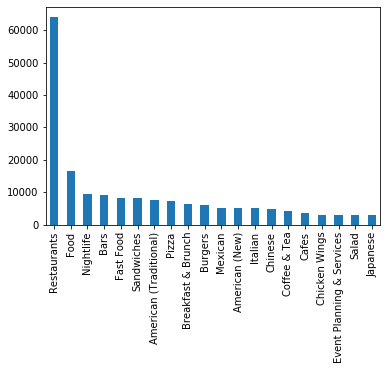

In [58]:
category_counts.plot(kind='bar')

This has given us our first surprise. Our dataset contains more than just our desired industry (Restaurants). Someone hasn't thought to give us just the data we wanted. Over time this will surprise you less and less. In fact, as a data scientist, you'll become surprised when someone gives you a clean dataset containing only the data you wanted! Restaurants do seem to be our most frequent type of business, but represent fewer than 60,000 out of our original 188,000 businesses. We now figure we want to filter and keep just those businesses that have 'Restaurant' in their categories entry.



Before we start filtering on categories, however, remember we noticed early on that there were fewer non-null categories than there were business_id? How many null (missing) categories are there?

In [21]:
pd.isna(business['categories']).sum()

524

There are 541 business_id that have no category associated with them. Clearly these are not much use to us. First, we will have a quick look at the first few of them to check

In [28]:
business.loc[pd.isna(business['categories'])].head()

,business_id,city,state,stars,review_count,categories
141,2W1tLg8ybRUEKMPoAPHTsQ,Las Vegas,NV,1.0,3,None
217,oCbk_T5eyc3KB0iT6T5q9w,Lorain,OH,1.0,4,None
293,4YI_gJQuW-8d_o2xvflJxA,Scottsdale,AZ,1.5,6,None
570,reOlnE49Ug3BMSGn3IAweg,McKeesport,PA,5.0,3,None
747,KnAV3ZhOWWNhqnvqIkxYOg,Scottsdale,AZ,1.5,3,None


Sure enough there is no information in the categories column for these businesses. Go ahead and remove these 541 rows from the DataFrame. Assign the result back to the original DataFrame.

In [39]:
# hint, the opposite of pd.isna() is ~pd.isna()
# one line of code here, assigning the result back to business
business = business.loc[~pd.isna(business['categories'])]

In [40]:
business.shape

(208869, 6)

Remember how you filtered our pet owner survey to select just dog owners? Now you're going to filter our business DataFrame to keep just those rows (businesses) that are restaurants. You'll do this in exactly the same way you did when testing whether 'dog' was in the list, although you'll keep all columns, not calculate a summary statistic, and will overwrite the original business DataFrame. Remember, we have a nice tidy list of categories now.

In [41]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [42]:
business.shape

(63944, 6)

And now we can count the different categories for what should now just be restaurants

In [43]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [49]:
restaurant_category_counts.head(15)

Restaurants               63944
Food                      16480
Nightlife                  9400
Bars                       9004
Fast Food                  8106
Sandwiches                 8064
American (Traditional)     7596
Pizza                      7302
Breakfast & Brunch         6225
Burgers                    6107
Mexican                    5207
American (New)             5118
Italian                    5012
Chinese                    4746
Coffee & Tea               4318
dtype: int64

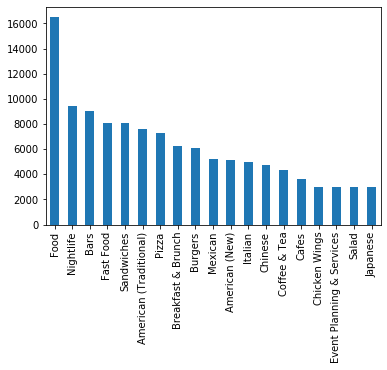

In [47]:
# 'Restaurants', of course, is our most frequent entry because, by definition, it is
# present in every case! Plot a bar chart now of the frequencies of the other values.
restaurant_category_counts[1:].plot(kind='bar')

We see we still have a few noise categories coming in, such as 'Food' and 'Nightlife'. But we can see that Pizza restaurants would seem to be a good bet for our marketing campaign trial! However, we also notice that Italian is pretty close behind, and using our domain knowledge, we figure that we'll use businesses that mention either Pizza or Italian.

## Save desired business ID to file
Now it's time to create the final list of the business IDs we're interested in. These are (Restaurant) businesses that have either 'Italian' or 'Pizza' in their categories column.

In [52]:
# task use a lambda function on the categories column again, but now you're not testing for
# 'Restaurant' but either 'Pizza or 'Italian'
# assign the result to italian_pizza (one line of code)
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza' in x) | ('Italian' in x)), :]

In [54]:
len(italian_pizza)

9827

In [53]:
italian_pizza.head()

,business_id,city,state,stars,review_count,categories
63,ZkzutF0P_u0C0yTulwaHkA,Plum,PA,4.0,31,"[Restaurants, Pizza]"
86,OWkS1FXNJbozn-qPg3LWxg,Las Vegas,NV,4.5,11,"[Food, Food Trucks, Restaurants, Pizza]"
90,6GHwgKNlvfIMUpFaxgBjUA,Montréal,QC,4.0,9,"[Sandwiches, Italian, Restaurants]"
105,-C0AlwLuXpcP609madJZQQ,Milton,ON,3.5,7,"[Restaurants, Pizza]"
120,39lLJK_rrYY2NYomSsQdUA,Beachwood,OH,2.5,11,"[Restaurants, Pizza]"


In [55]:
# Check the shape of the DataFrame
italian_pizza.shape

(9827, 6)

In [56]:
# task: use panda's to_csv DataFrame method to save the result to a file
# use the index argument to suppress saving the index
# use the columns argument to save only the business_id, review_count, stars, and state columns
# one line of code here
italian_pizza.to_csv('business_list.csv', columns=['business_id', 'review_count', 'stars', 'state'], index=False)

# Summary
Well done. You've done some pretty impressive data wrangling and some exploratory data analysis. You've read in some data and extracted a list of categories from one column, which is a pretty tricky thing to do! You've then explored the data and discovered a popular type of cuisine, then used that to extract just the relevant business IDs so you can use them as a key in your next step.